In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
sale = pd.read_csv('/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv');

In [5]:
sale.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [6]:
sale.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [8]:
sale.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


check for duplicate values in the dataset wrt Transaction ID

In [9]:
sale[sale.duplicated(subset='Transaction ID')]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


copy sale data to cafe for further use

In [10]:
cafe = sale.copy()

In [11]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


quantity, price per unit, total spent needed to be in numeric

In [12]:
cafe['Quantity'] = pd.to_numeric(cafe['Quantity'], errors='coerce')
cafe['Price Per Unit'] = pd. to_numeric(cafe['Price Per Unit'], errors='coerce')
cafe['Total Spent'] = pd.to_numeric(cafe['Total Spent'], errors='coerce')

In [13]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [14]:
cafe[cafe['Price Per Unit'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
56,TXN_3578141,Cake,5.0,NaN,15.0,NaN,Takeaway,2023-06-27
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
68,TXN_8427104,Salad,2.0,NaN,10.0,NaN,In-store,2023-10-27
85,TXN_8035512,Tea,3.0,NaN,4.5,Cash,UNKNOWN,2023-10-29
104,TXN_7447872,Juice,2.0,NaN,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9924,TXN_5981429,Juice,2.0,NaN,6.0,Digital Wallet,NaN,2023-12-24
9926,TXN_2464706,Cake,4.0,NaN,12.0,Digital Wallet,Takeaway,2023-11-09
9961,TXN_2153100,Tea,2.0,NaN,3.0,Cash,NaN,2023-12-29
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02


In [15]:
cafe['Price Per Unit'].fillna(cafe['Total Spent'] / cafe['Quantity'], inplace=True)

In [16]:
cafe[cafe['Price Per Unit'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
629,TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30
912,TXN_1575608,Sandwich,NaN,NaN,20.0,ERROR,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,ERROR
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,Cash,NaN,2023-03-05
1674,TXN_9367492,Tea,2.0,NaN,NaN,Cash,In-store,2023-06-19
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,NaN,NaN,NaN,NaN,2023-11-08
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09


In [17]:
cafe[cafe['Total Spent'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
25,TXN_7958992,Smoothie,3.0,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
31,TXN_8927252,UNKNOWN,2.0,1.0,NaN,Credit Card,ERROR,2023-11-06
42,TXN_6650263,Tea,2.0,1.5,NaN,NaN,Takeaway,2023-01-10
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
...,...,...,...,...,...,...,...,...
9893,TXN_3809533,Juice,2.0,NaN,NaN,Digital Wallet,Takeaway,2023-02-02
9954,TXN_1191659,Coffee,4.0,2.0,NaN,Credit Card,In-store,2023-11-21
9977,TXN_5548914,Juice,2.0,3.0,NaN,Digital Wallet,In-store,2023-11-04
9988,TXN_9594133,Cake,5.0,3.0,NaN,ERROR,NaN,NaN


In [18]:
cafe['Total Spent'].fillna(cafe['Quantity'] * cafe['Price Per Unit'], inplace=True)

In [19]:
cafe[cafe['Total Spent'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1674,TXN_9367492,Tea,2.0,NaN,NaN,Cash,In-store,2023-06-19
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,NaN,NaN,NaN,NaN,2023-11-08
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2585,TXN_1259340,Tea,3.0,NaN,NaN,Digital Wallet,NaN,2023-02-24


In [20]:
cafe[cafe['Quantity'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,NaN,4.0,20.0,Cash,In-store,2023-04-04
55,TXN_5522862,Cookie,NaN,1.0,2.0,Credit Card,Takeaway,2023-03-19
57,TXN_2080895,Cake,NaN,3.0,3.0,Digital Wallet,In-store,2023-04-19
66,TXN_8501819,Juice,NaN,3.0,6.0,Cash,NaN,2023-03-30
117,TXN_2148617,Juice,NaN,3.0,9.0,Digital Wallet,UNKNOWN,2023-01-10
...,...,...,...,...,...,...,...,...
9932,TXN_8502079,Tea,NaN,1.5,3.0,Cash,NaN,2023-04-20
9935,TXN_9778251,Tea,NaN,1.5,6.0,NaN,Takeaway,2023-11-09
9944,TXN_7495283,Cake,NaN,3.0,15.0,Credit Card,Takeaway,2023-04-14
9957,TXN_6487003,Coffee,NaN,2.0,8.0,Credit Card,Takeaway,2023-11-15


In [21]:
cafe['Quantity'].fillna(cafe['Total Spent'] / cafe['Price Per Unit'], inplace=True)

In [22]:
cafe[cafe['Quantity'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
629,TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
912,TXN_1575608,Sandwich,NaN,NaN,20.0,ERROR,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,ERROR
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,Cash,NaN,2023-03-05
2330,TXN_3849488,Salad,NaN,NaN,5.0,NaN,In-store,2023-03-01


In [23]:
cafe[cafe['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
30,TXN_1736287,NaN,5.0,2.0,10.0,Digital Wallet,NaN,2023-06-02
61,TXN_8051289,NaN,1.0,3.0,3.0,NaN,In-store,2023-10-09
72,TXN_6044979,NaN,1.0,1.0,1.0,Cash,In-store,2023-12-08
89,TXN_4132730,NaN,5.0,1.0,5.0,NaN,In-store,2023-03-12
...,...,...,...,...,...,...,...,...
9820,TXN_8751702,NaN,5.0,3.0,15.0,Cash,NaN,2023-02-13
9855,TXN_3740505,NaN,2.0,1.5,3.0,NaN,NaN,2023-11-21
9876,TXN_3105633,NaN,1.0,2.0,2.0,NaN,In-store,2023-03-30
9885,TXN_4659954,NaN,3.0,4.0,12.0,Credit Card,In-store,NaN


In [24]:
cafe['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

In [25]:
cafe['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [26]:
def guess_item_acc_to_price(df):
    if 'Price Per Unit' in df.columns and 'Item' in df.columns:
        df.loc[(df['Price Per Unit'] == 2.0) & (df['Item'].isna()), 'Item'] = 'Coffee'
        df.loc[(df['Price Per Unit'] == 1.5) & (df['Item'].isna()), 'Item'] = 'Tea'
        df.loc[(df['Price Per Unit'] == 4.0) & (df['Item'].isna()), 'Item'] = 'Sandwich'
        df.loc[(df['Price Per Unit'] == 5.0) & (df['Item'].isna()), 'Item'] = 'Salad'
        df.loc[(df['Price Per Unit'] == 3.0) & (df['Item'].isna()), 'Item'] = 'Cake'
        df.loc[(df['Price Per Unit'] == 1.0) & (df['Item'].isna()), 'Item'] = 'Cookie'
    else:
        Print("Missing expected columns in DataFrame")
    return df

In [27]:
cafe =  guess_item_acc_to_price(cafe)

In [28]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9962 non-null   float64
 3   Price Per Unit    9962 non-null   float64
 4   Total Spent       9960 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [29]:
cafe[cafe['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
9819,TXN_1208561,NaN,NaN,NaN,20.0,Credit Card,NaN,2023-08-19


In [30]:
def price_acc_to_item(df):
    if 'Item' in df.columns and 'Price Per Unit' in df. columns:
        df.loc[(df['Item'] == 'Coffee') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 2
        df.loc[(df['Item'] == 'Tea') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 1.5
        df.loc[(df['Item'] == 'Sandwich') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4
        df.loc[(df['Item'] == 'Salad') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4
        df.loc[(df['Item'] == 'Cake') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 3
        df.loc[(df['Item'] == 'Cookie') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 1
        df.loc[(df['Item'] == 'Smoothie') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4
        df.loc[(df['Item'] == 'Juice') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 3
    else:
        print('Missing expected columns in Data Frame')
    return df

In [31]:
cafe = price_acc_to_item(cafe)

In [32]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9962 non-null   float64
 3   Price Per Unit    9994 non-null   float64
 4   Total Spent       9960 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [33]:
cafe[cafe['Total Spent'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1674,TXN_9367492,Tea,2.0,1.5,NaN,Cash,In-store,2023-06-19
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,4.0,NaN,NaN,NaN,2023-11-08
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2585,TXN_1259340,Tea,3.0,1.5,NaN,Digital Wallet,NaN,2023-02-24


In [34]:
cafe['Total Spent'].fillna(cafe['Price Per Unit'] * cafe['Quantity'], inplace=True)

In [35]:
cafe[cafe['Quantity'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
629,TXN_9289174,Cake,NaN,3.0,12.0,Digital Wallet,In-store,2023-12-30
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
912,TXN_1575608,Sandwich,NaN,4.0,20.0,ERROR,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,1.5,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,1.5,6.0,Cash,Takeaway,ERROR
1482,TXN_3593060,Smoothie,NaN,4.0,16.0,Cash,NaN,2023-03-05
2330,TXN_3849488,Salad,NaN,4.0,5.0,NaN,In-store,2023-03-01


In [36]:
cafe['Quantity'].fillna(cafe['Total Spent']/ cafe['Price Per Unit'], inplace=True)

In [37]:
cafe['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'ERROR', 'Juice', 'Tea', nan], dtype=object)

In [38]:
def guess_item(df):
    if 'Item' in df.columns and 'Price Per Unit' in df.columns:
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 2), 'Item'] = 'Coffee'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 1.5), 'Item'] = 'Tea'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 4), 'Item'] = 'Sandwich'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 5), 'Item'] = 'Salad'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 3), 'Item'] = 'Cake'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 1), 'Item'] = 'Cookie'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 4), 'Item'] = 'Smoothie'
        df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 3), 'Item'] = 'Juice'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 2), 'Item'] = 'Coffee'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 1.5), 'Item'] = 'Tea'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 4), 'Item'] = 'Sandwich'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 5), 'Item'] = 'Salad'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 3), 'Item'] = 'Cake'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 1), 'Item'] = 'Cookie'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 4), 'Item'] = 'Smoothie'
        df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 3), 'Item'] = 'Juice'
    else:
        print("Missing expected columns in DataFrame.")
    return df

In [39]:
cafe = guess_item(cafe)

In [40]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9977 non-null   float64
 3   Price Per Unit    9994 non-null   float64
 4   Total Spent       9977 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [41]:
cafe[cafe['Item'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4152,TXN_9646000,ERROR,2.0,NaN,NaN,NaN,In-store,2023-12-14
7597,TXN_1082717,ERROR,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13


In [42]:
cafe['Price Per Unit'].isna().sum()

6

In [43]:
cafe['Price Per Unit'].fillna(cafe['Price Per Unit'].mode()[0], inplace=True)

In [44]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9977 non-null   float64
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       9977 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [45]:
cafe['Quantity'].mode()[0]

5.0

In [46]:
cafe['Quantity'].fillna(cafe['Quantity'].mode()[0], inplace=True)

In [47]:
cafe['Total Spent'] = cafe['Quantity'] * cafe['Price Per Unit']

In [48]:
cafe[cafe['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,NaN,4.0,3.0,12.0,Credit Card,NaN,2023-02-09
9819,TXN_1208561,NaN,5.0,3.0,15.0,Credit Card,NaN,2023-08-19


In [49]:
cafe['Item'].fillna('Juice', inplace=True)

In [50]:
cafe['Item'] = cafe['Item'].astype('category')

In [51]:
cafe['Item'].cat.categories

Index(['Cake', 'Coffee', 'Cookie', 'ERROR', 'Juice', 'Salad', 'Sandwich',
       'Smoothie', 'Tea', 'UNKNOWN'],
      dtype='object')

In [52]:
cafe[cafe['Item'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4152,TXN_9646000,ERROR,2.0,3.0,6.0,NaN,In-store,2023-12-14
7597,TXN_1082717,ERROR,5.0,3.0,15.0,Digital Wallet,In-store,2023-12-13


In [53]:
cafe['Item'] = cafe['Item'].replace('ERROR', 'Juice')

In [54]:
cafe['Item'] = cafe['Item'].replace('UNKNOWN', 'Juice')

In [55]:
cafe['Item'].cat.categories

Index(['Cake', 'Coffee', 'Cookie', 'Juice', 'Salad', 'Sandwich', 'Smoothie',
       'Tea'],
      dtype='object')

In [56]:
cafe[cafe['Payment Method'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,Cake,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31
13,TXN_9437049,Cookie,5.0,1.0,5.0,NaN,Takeaway,2023-06-01
14,TXN_8915701,Tea,2.0,1.5,3.0,NaN,In-store,2023-03-21
16,TXN_3765707,Sandwich,1.0,4.0,4.0,NaN,NaN,2023-06-10
...,...,...,...,...,...,...,...,...
9978,TXN_4302199,Tea,3.0,1.5,4.5,NaN,NaN,2023-02-16
9982,TXN_8567525,Cookie,2.0,1.0,2.0,NaN,Takeaway,2023-12-30
9985,TXN_3297457,Cake,2.0,3.0,6.0,NaN,UNKNOWN,2023-01-03
9994,TXN_7851634,Sandwich,4.0,4.0,16.0,NaN,NaN,2023-01-08


In [57]:
cafe['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [58]:
cafe['Payment Method'] = cafe['Payment Method'].replace('ERROR', np.nan)
cafe['Payment Method'] = cafe['Payment Method'].replace('UNKNOWN', np.nan)

In [59]:
cafe['Payment Method'].mode()

0    Digital Wallet
Name: Payment Method, dtype: object

In [60]:
cafe['Payment Method'].fillna(cafe['Payment Method'].mode()[0], inplace=True)

In [61]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          10000 non-null  float64 
 3   Price Per Unit    10000 non-null  float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    10000 non-null  object  
 6   Location          6735 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), float64(3), object(4)
memory usage: 557.1+ KB


In [62]:
cafe['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [63]:
cafe['Location'] = cafe['Location'].replace('UNKNOWN', np.nan)
cafe['Location'] = cafe['Location'].replace('ERROR', np.nan)

In [64]:
cafe['Location'].fillna(cafe['Location'].mode()[0], inplace=True)

In [65]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          10000 non-null  float64 
 3   Price Per Unit    10000 non-null  float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    10000 non-null  object  
 6   Location          10000 non-null  object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), float64(3), object(4)
memory usage: 557.1+ KB


In [66]:
cafe['Transaction Date'] = cafe['Transaction Date'].replace('ERROR', np.nan)
cafe['Transaction Date'] = cafe['Transaction Date'].replace('UNKNOWN', np.nan)

In [67]:
cafe['Transaction Date'] = pd.to_datetime(cafe['Transaction Date'])

In [68]:
cafe['Transaction Date'].min()

Timestamp('2023-01-01 00:00:00')

In [69]:
cafe['Transaction Date'].max()

Timestamp('2023-12-31 00:00:00')

In [70]:
date_range = pd.date_range(start='2023-01-01', end='2023-12-31')
cafe.loc[cafe['Transaction Date'].isna(), 'Transaction Date'] = np.random.choice(date_range, size=cafe['Transaction Date'].isna().sum())

In [71]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  category      
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), object(3)
memory usage: 557.1+ KB


In [72]:
cafe['Payment Method'] = cafe['Payment Method'].astype('category')
cafe['Location'] =  cafe['Location'].astype('category')

In [73]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  category      
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  category      
 6   Location          10000 non-null  category      
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 420.7+ KB


In [74]:
cafe['Payment Method'].cat.categories

Index(['Cash', 'Credit Card', 'Digital Wallet'], dtype='object')

In [75]:
cafe['Location'].cat.categories

Index(['In-store', 'Takeaway'], dtype='object')

Exprolatory Data Analysis

In [76]:
cafe['Total Spent'].describe()

count    10000.000000
mean         8.940950
std          6.006825
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         25.000000
Name: Total Spent, dtype: float64

In [77]:
cafe['Total Spent'].value_counts(ascending=False).reset_index().set_index('Total Spent')

,count
Total Spent,
6.0,1020
12.0,998
4.0,969
3.0,968
20.0,795
15.0,773
8.0,720
10.0,547
2.0,518


<Axes: ylabel='Frequency'>

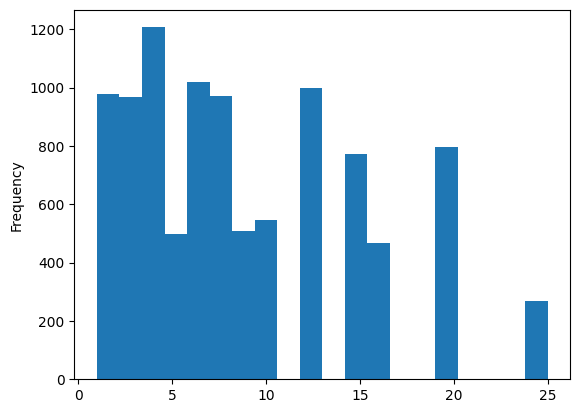

In [78]:
cafe['Total Spent'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

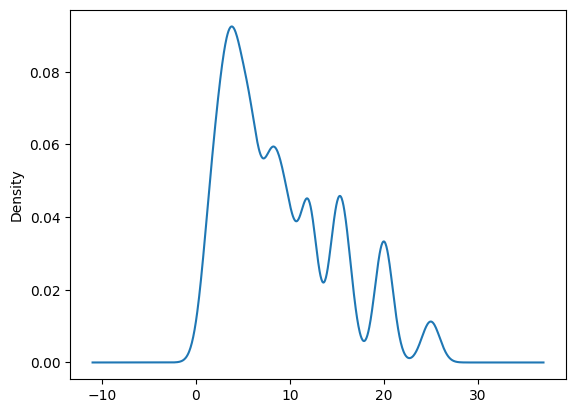

In [79]:
cafe['Total Spent'].plot(kind='kde')

In [80]:
cafe['Total Spent'].skew()

0.8172241677074135

<Axes: >

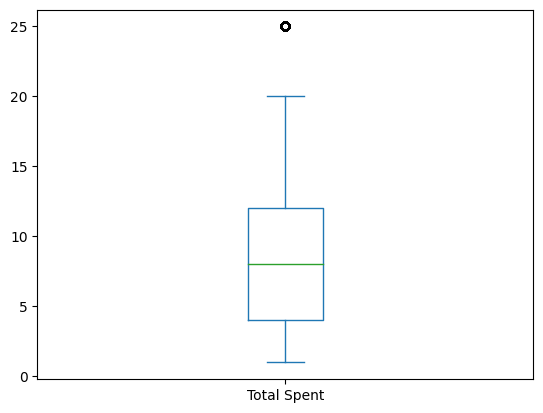

In [81]:
cafe['Total Spent'].plot(kind='box')

In [82]:
cafe[cafe['Total Spent'] > 20]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
51,TXN_6342161,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-01-08
52,TXN_8914892,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-03-15
96,TXN_5220895,Salad,5.0,5.0,25.0,Cash,In-store,2023-06-10
100,TXN_9517146,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-10-30
...,...,...,...,...,...,...,...,...
9791,TXN_1232346,Salad,5.0,5.0,25.0,Digital Wallet,In-store,2023-01-04
9805,TXN_9506076,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-01-17
9879,TXN_6393305,Salad,5.0,5.0,25.0,Digital Wallet,In-store,2023-10-19
9908,TXN_8922585,Salad,5.0,5.0,25.0,Credit Card,Takeaway,2023-06-22


Average price spent is around 8 with total spent 6 is the most

In [83]:
cafe['Payment Method'].value_counts()

Payment Method
Digital Wallet    5469
Credit Card       2273
Cash              2258
Name: count, dtype: int64

<Axes: xlabel='Payment Method'>

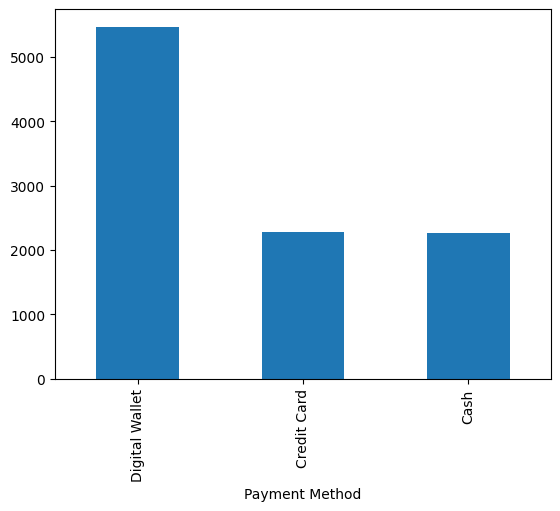

In [84]:
cafe['Payment Method'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

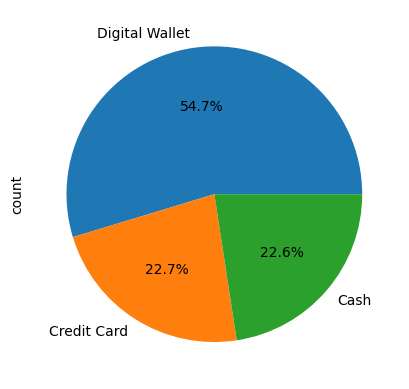

In [85]:
cafe['Payment Method'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

Digital Wallet is the most used payment method accounting 55 percent

In [86]:
cafe['Location'].value_counts()

Location
Takeaway    6983
In-store    3017
Name: count, dtype: int64

<Axes: xlabel='Location'>

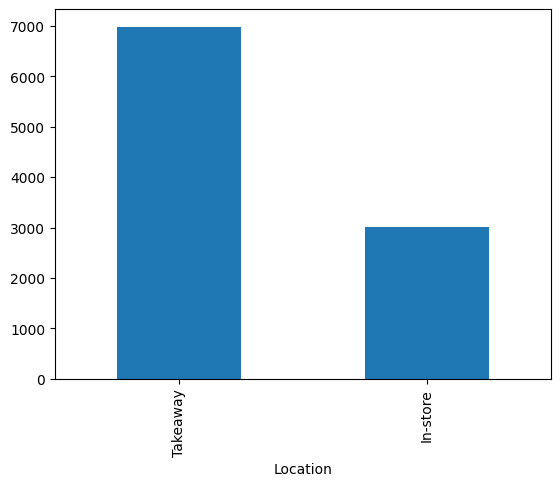

In [87]:
cafe['Location'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

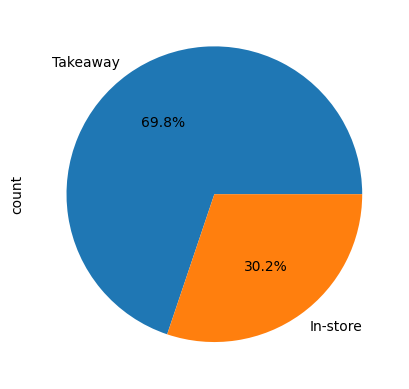

In [88]:
cafe['Location'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

Almost 70 % people went for the takeaway facility

In [89]:
cafe['Item'].value_counts()

Item
Cake        1386
Sandwich    1358
Coffee      1291
Salad       1272
Cookie      1213
Tea         1207
Juice       1177
Smoothie    1096
Name: count, dtype: int64

<Axes: xlabel='Item'>

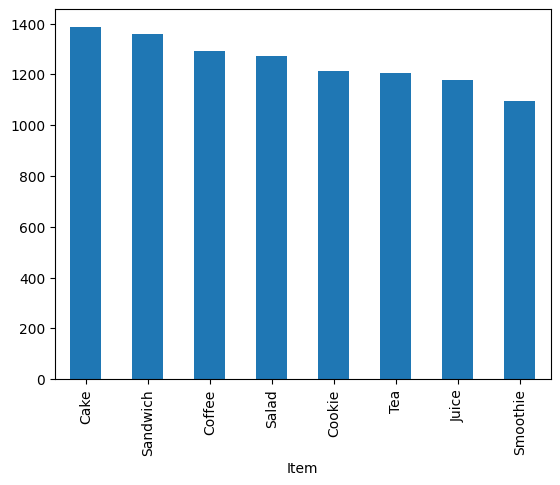

In [90]:
cafe['Item'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

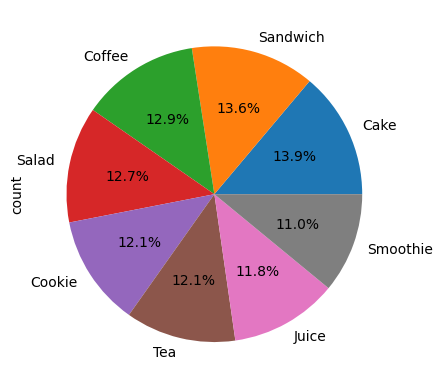

In [91]:
cafe['Item'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

Cake Sandwich and Salaad are the top seller

In [92]:
pd.crosstab(cafe['Quantity'], cafe['Item'])

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Quantity,,,,,,,,
1.00,261,256,249,221,259,260,207,212
1.25,0,0,0,0,1,0,0,0
2.00,288,249,262,245,260,261,216,275
3.00,265,256,211,244,229,283,220,238
4.00,262,243,253,233,253,248,218,231
5.00,310,287,238,234,270,306,235,251


In [93]:
pd.crosstab(cafe['Quantity'], cafe['Item'], normalize='columns') * 100

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Quantity,,,,,,,,
1.00,18.831169,19.829589,20.527617,18.776551,20.361635,19.145803,18.886861,17.564209
1.25,0.000000,0.000000,0.000000,0.000000,0.078616,0.000000,0.000000,0.000000
2.00,20.779221,19.287374,21.599340,20.815633,20.440252,19.219440,19.708029,22.783761
3.00,19.119769,19.829589,17.394889,20.730671,18.003145,20.839470,20.072993,19.718310
4.00,18.903319,18.822618,20.857378,19.796092,19.889937,18.262150,19.890511,19.138360
5.00,22.366522,22.230829,19.620775,19.881054,21.226415,22.533137,21.441606,20.795360


<Axes: xlabel='Item', ylabel='Quantity'>

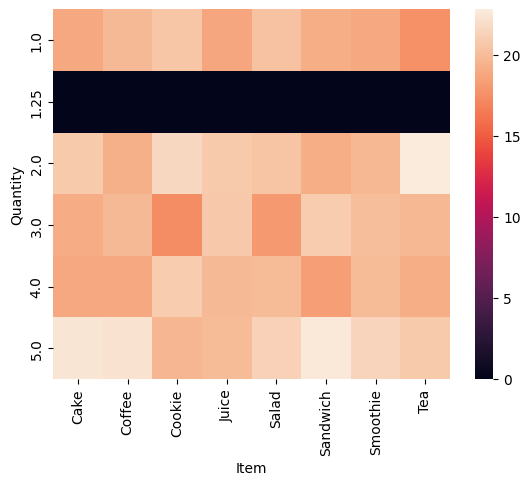

In [94]:
sns.heatmap(pd.crosstab(cafe['Quantity'], cafe['Item'], normalize='columns')*100)

In [95]:
cafe.groupby(['Item'])['Total Spent'].sum().reset_index()

,Item,Total Spent
0,Cake,12690.0
1,Coffee,7858.0
2,Cookie,3608.0
3,Juice,10635.0
4,Salad,19140.0
5,Sandwich,16612.0
6,Smoothie,13384.0
7,Tea,5482.5


In [97]:
total_spent_summary= cafe.groupby(['Item'])['Total Spent'].sum().reset_index()

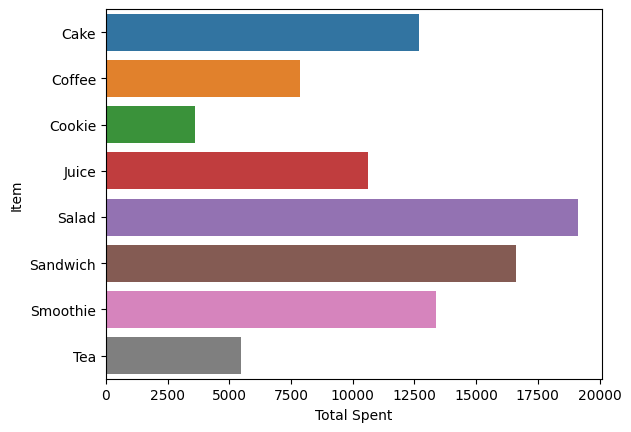

In [103]:
sns.barplot(data=total_spent_summary, x='Total Spent', y='Item')
plt.show()

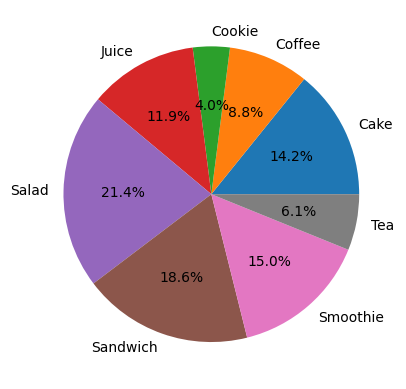

In [101]:
plt.pie(total_spent_summary['Total Spent'], labels=total_spent_summary['Item'], autopct = '%0.1f%%')
plt.show()

Cake Smoother Salad and Sandwich are the top products on which people spent their money

In [104]:
pd.crosstab(cafe['Payment Method'], cafe['Total Spent'])

Total Spent,1.0,1.5,2.0,3.0,4.0,4.5,5.0,6.0,7.5,8.0,9.0,10.0,12.0,15.0,16.0,20.0,25.0
Payment Method,,,,,,,,,,,,,,,,,
Cash,51,49,102,222,214,58,128,238,50,141,126,125,210,172,116,191,65
Credit Card,62,43,121,213,222,51,108,209,64,167,114,127,244,176,114,173,65
Digital Wallet,136,120,295,533,533,129,262,573,137,412,269,295,544,425,236,431,139


In [108]:
cafe.groupby(['Payment Method'])['Total Spent'].sum().reset_index()

,Payment Method,Total Spent
0,Cash,20467.5
1,Credit Card,20508.0
2,Digital Wallet,48434.0


In [109]:
payment_method_summary = cafe.groupby(['Payment Method'])['Total Spent'].sum().reset_index()

<Axes: xlabel='Payment Method', ylabel='Total Spent'>

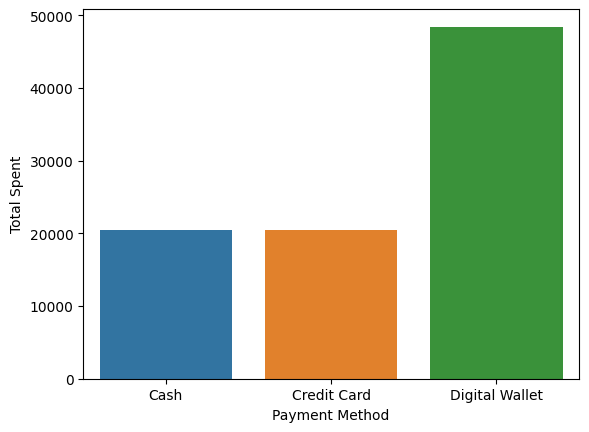

In [110]:
sns.barplot(data=payment_method_summary, x='Payment Method', y='Total Spent')

<Axes: xlabel='Total Spent', ylabel='Payment Method'>

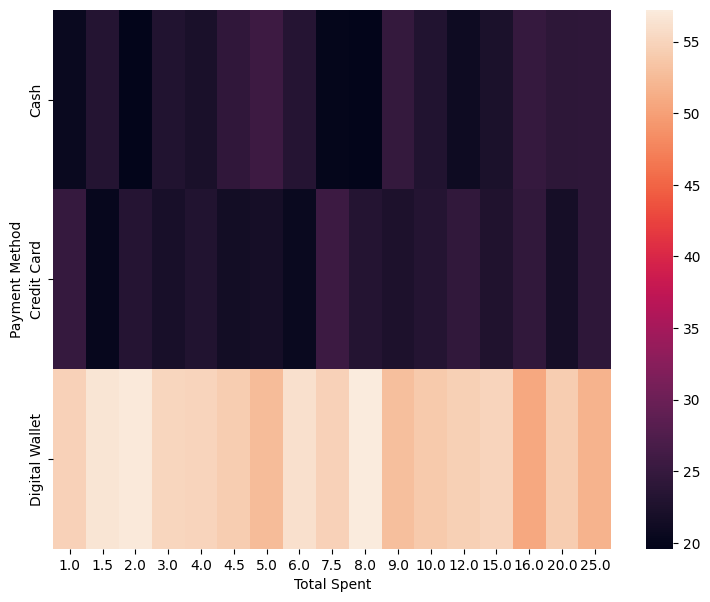

In [112]:
plt.figure(figsize = (9,7))
sns.heatmap(pd.crosstab(cafe['Payment Method'], cafe['Total Spent'], normalize='columns')*100)

In [113]:
pd.crosstab(cafe['Location'], cafe['Item'])

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Location,,,,,,,,
In-store,400,352,373,364,406,431,322,369
Takeaway,986,939,840,813,866,927,774,838


In [114]:
pd.crosstab(cafe['Location'], cafe['Item'], normalize='columns')*100

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Location,,,,,,,,
In-store,28.860029,27.265686,30.750206,30.926083,31.918239,31.73785,29.379562,30.571665
Takeaway,71.139971,72.734314,69.249794,69.073917,68.081761,68.26215,70.620438,69.428335


<Axes: xlabel='Item', ylabel='Location'>

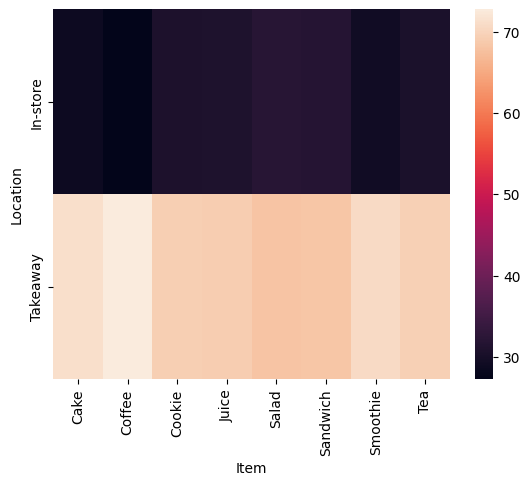

In [115]:
sns.heatmap(pd.crosstab(cafe['Location'], cafe['Item'], normalize='columns')*100)

Though number are very close but salad and smoothie people prefer in-store

In [116]:
cafe['Transaction Date'] = pd.to_datetime(cafe['Transaction Date'])

In [117]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  category      
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  category      
 6   Location          10000 non-null  category      
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 420.7+ KB


In [119]:
cafe['Month'] = cafe['Transaction Date'].dt.month_name()
cafe['Day'] = cafe['Transaction Date'].dt.day_name()

In [121]:
cafe['Month End'] = cafe['Transaction Date'].dt.is_month_end

In [123]:
sale_summary = cafe.groupby(['Month', 'Day'])['Total Spent'].sum().reset_index()

In [124]:
pivot = sale_summary.pivot(index='Day', columns='Month', values='Total Spent')

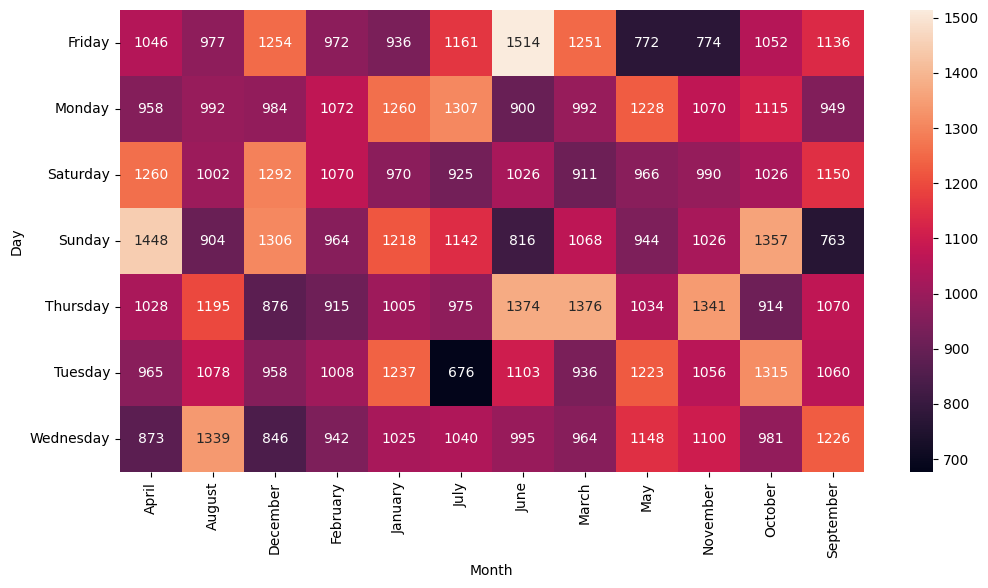

In [126]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.show()